In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Malgun Gothic"

import sys
sys.path.append("../src/")

from utils import *

import warnings
warnings.filterwarnings("ignore")

In [2]:
bnd = gpd.read_file(
    "../data/BND_ADM_DONG_PG/BND_ADM_DONG_PG.shp", 
    encoding="cp949"
    )

bnd = bnd[bnd["ADM_CD"].apply(lambda x: str(x)[0:2] == "38")]
bnd["ADM_CD"] = bnd["ADM_CD"].astype(str)
bnd["SGG_CD"] = bnd["ADM_CD"].apply(lambda x: x[0:5])

sgg_cd = [{
    "창원시 성산구" : '38112',
    "의령군" : '38510', 
    "창녕군" : '38530', 
    "고성군" : '38540', 
    "남해군" : '38550', 
    "하동군" : '38560', 
    "산청군" : '38570',
    "거창군" : '38590', 
    "합천군" : '38600', 
    "사천시" : '38060', 
    "양산시" : '38100', 
    "거제시" : '38090', 
    "김해시" : '38070', 
    "밀양시" : '38080',
    "창원시 진해구" : '38115', 
    "함양군" : '38580', 
    "창원시 의창구" : '38111', 
    "창원시 마산합포구" : '38113', 
    "창원시 마산회원구" : '38114', 
    "진주시" : '38030', 
    "통영시" : '38050',
    "함안군" : '38520'
    }]

sgg_cd = pd.DataFrame(sgg_cd).T.reset_index().rename(columns={"index" : "시군구명", 0 : "SGG_CD"})
bnd = pd.merge(bnd, sgg_cd, on="SGG_CD", how="left")
bnd = bnd.to_crs(crs="EPSG:5179")

In [3]:
## 노인 중심점 데이터
silver_index = pd.read_csv(
    filepath_or_buffer="../data/silver_index.csv"
)
threshold = silver_index["total_idx"].quantile(0.20)
silver_index_bot20 = silver_index[silver_index["total_idx"] <= threshold]
silver = pd.read_csv(
    filepath_or_buffer="../data/silver.csv"
).rename(columns={"gid" : "격자이름"})
silver_index_bot20 = pd.merge(left=silver_index_bot20[["격자이름", "total_idx"]], right=silver[["격자이름", "경도", "위도"]], on="격자이름", how="left")
silver_index_bot20 = gpd.GeoDataFrame(silver_index_bot20, geometry=gpd.points_from_xy(silver_index_bot20['경도'], silver_index_bot20['위도']))
silver_index_bot20 = silver_index_bot20.set_crs(crs="EPSG:4326")
silver_index_bot20 = silver_index_bot20.to_crs(epsg=5179)
print(silver_index_bot20.crs)

EPSG:5179


In [4]:
silver_index_bot20

,격자이름,total_idx,경도,위도,geometry
0,라라886488,0.000000,128.469477,34.830412,POINT (1088650 1648850)
1,마라032361,0.000268,128.627558,34.714531,POINT (1103250 1636150)
2,라라986500,0.000000,128.578962,34.840310,POINT (1098650 1650050)
3,마라026687,0.000000,128.625003,35.008510,POINT (1102650 1668750)
4,마라066391,0.001098,128.665062,34.741230,POINT (1106650 1639150)
...,...,...,...,...,...
5325,라마549407,0.000465,128.107103,35.661413,POINT (1054950 1740750)
5326,라마735387,0.000000,128.312402,35.642171,POINT (1073550 1738750)
5327,라마664324,0.000030,128.233466,35.585875,POINT (1066450 1732450)
5328,라마710315,0.000225,128.284157,35.577441,POINT (1071050 1731550)


In [5]:
## 시설 위치 데이터
facility_index = pd.read_csv(
    filepath_or_buffer="../data/facility_index.csv"
)
threshold = facility_index["total_idx"].quantile(0.20)
facility_index_bot20 = facility_index[facility_index["total_idx"] <= threshold]

facility = pd.read_csv(
    filepath_or_buffer="../data/facility.csv"
)
facility_index_bot20 = pd.merge(left=facility_index_bot20[["시설명", "total_idx"]], right=facility[["시설명", "경도", "위도"]], on="시설명", how="left")
facility_index_bot20 = gpd.GeoDataFrame(facility_index_bot20, geometry=gpd.points_from_xy(facility_index_bot20['경도'], facility_index_bot20['위도']))
facility_index_bot20 = facility_index_bot20.set_crs(crs="EPSG:4326")
facility_index_bot20 = facility_index_bot20.to_crs(epsg=5179)
print(facility_index_bot20.crs)

EPSG:5179


In [6]:
facility_index_bot20

,시설명,total_idx,경도,위도,geometry
0,거창소방서,0.000000,127.923447,35.677620,POINT (1038319.146 1742460.38)
1,하동소방서,0.000191,127.795562,34.977865,POINT (1026977.866 1664813.236)
2,합천소방서,0.000177,128.148244,35.572984,POINT (1058738.432 1730966.165)
3,가곡 경로당,0.002217,128.644386,35.359032,POINT (1103971.225 1707645.434)
4,달천 경로당,0.002188,128.661050,35.362058,POINT (1105481.343 1707998.725)
...,...,...,...,...,...
9065,자유시장,0.003293,128.628329,35.200851,POINT (1102711.913 1690085.071)
9066,자유시장,0.003293,128.325036,35.468115,POINT (1074855.523 1719454.924)
9067,춘천후평시장,0.001528,127.885475,34.770915,POINT (1035273.088 1641891.533)
9068,장성중앙시장,0.000135,127.891709,35.113547,POINT (1035694.751 1679890.225)


In [7]:
## 버스 정류장 위치 데이터
busstop = pd.read_csv(
    filepath_or_buffer="../data/busstop_act.csv", 
)

## geo data 형태로 변형
busstop = gpd.GeoDataFrame(
    busstop, 
    geometry=gpd.points_from_xy(busstop['경도'], busstop['위도'])
    )

## crs값 설정
busstop = busstop.set_crs(crs="EPSG:4326")
busstop = busstop.to_crs(epsg=5179)

### 하위 20% 지역 확인

In [8]:
## 노인 중심점 데이터
silver_index_bot20_within_bnd = gpd.sjoin(
    silver_index_bot20, 
    bnd[["geometry", "ADM_NM", "ADM_CD", "시군구명"]], 
    how='inner', 
    predicate='within'
    ).drop(columns="index_right")
silver_ADM_counts = pd.DataFrame(silver_index_bot20_within_bnd.groupby('ADM_NM').size(), columns=["silver_ADM_count"])
silver_SGG_counts = pd.DataFrame(silver_index_bot20_within_bnd.groupby('시군구명').size(), columns=["silver_SGG_count"])

bnd = pd.merge(pd.merge(bnd, silver_ADM_counts, on="ADM_NM", how="left"), silver_SGG_counts, on="시군구명", how="left")
bnd[["silver_ADM_count", "silver_SGG_count"]] = bnd[["silver_ADM_count", "silver_SGG_count"]].fillna(0)

## 시설 위치 데이터
facility_index_bot20_within_bnd = gpd.sjoin(
    facility_index_bot20, 
    bnd[["geometry", "ADM_NM", "ADM_CD", "시군구명"]], 
    how='inner', 
    predicate='within'
    ).drop(columns="index_right")
facility_ADM_counts = pd.DataFrame(facility_index_bot20_within_bnd.groupby('ADM_NM').size(), columns=["facility_ADM_count"])
facility_SGG_counts = pd.DataFrame(facility_index_bot20_within_bnd.groupby('시군구명').size(), columns=["facility_SGG_count"])

bnd = pd.merge(pd.merge(bnd, facility_ADM_counts, on="ADM_NM", how="left"), facility_SGG_counts, on="시군구명", how="left")
bnd[["facility_ADM_count", "facility_SGG_count"]] = bnd[["facility_ADM_count", "facility_SGG_count"]].fillna(0)

In [9]:
bnd

,BASE_DATE,ADM_NM,ADM_CD,geometry,SGG_CD,시군구명,silver_ADM_count,silver_SGG_count,facility_ADM_count,facility_SGG_count
0,20230701,웅남동,38112570,"MULTIPOLYGON (((1099765.417 1686627.551, 10997...",38112,창원시 성산구,0.0,0.0,39.0,79.0
1,20230701,정곡면,38510360,"POLYGON ((1075624.316 1714457.051, 1075742.382...",38510,의령군,23.0,366.0,39.0,406.0
2,20230701,지정면,38510370,"POLYGON ((1079780.484 1715934.841, 1079845.949...",38510,의령군,15.0,366.0,41.0,406.0
3,20230701,낙서면,38510380,"POLYGON ((1079364.204 1724399.741, 1079377.139...",38510,의령군,24.0,366.0,25.0,406.0
4,20230701,부림면,38510390,"POLYGON ((1072035.204 1724895.283, 1072093.302...",38510,의령군,29.0,366.0,36.0,406.0
...,...,...,...,...,...,...,...,...,...,...
300,20230701,덕산동,38115610,"MULTIPOLYGON (((1107726.414 1682411.442, 11077...",38115,창원시 진해구,0.0,82.0,1.0,156.0
301,20230701,풍호동,38115620,"POLYGON ((1111112.686 1683497.44, 1111134.736 ...",38115,창원시 진해구,1.0,82.0,0.0,156.0
302,20230701,웅천동,38115630,"MULTIPOLYGON (((1110400.083 1675233.054, 11104...",38115,창원시 진해구,8.0,82.0,19.0,156.0
303,20230701,웅동1동,38115640,"POLYGON ((1115039.174 1686650.785, 1115063.972...",38115,창원시 진해구,12.0,82.0,45.0,156.0


In [26]:
bnd.sort_values(by="silver_ADM_count", ascending=False)[["ADM_NM", "시군구명", "silver_ADM_count", "silver_SGG_count"]].head(20)

,ADM_NM,시군구명,silver_ADM_count,silver_SGG_count
233,고현면,남해군,98.0,448.0
234,설천면,남해군,94.0,448.0
232,서면,남해군,94.0,448.0
203,남지읍,창녕군,87.0,432.0
246,옥종면,하동군,78.0,513.0
240,금남면,하동군,78.0,513.0
289,산내면,밀양시,77.0,513.0
255,가야면,합천군,70.0,819.0
256,야로면,합천군,69.0,819.0
93,진전면,창원시 마산합포구,68.0,110.0


In [33]:
bnd.sort_values(by="facility_ADM_count", ascending=False)[["ADM_NM", "시군구명", "facility_ADM_count", "facility_SGG_count"]].head(20)

,ADM_NM,시군구명,facility_ADM_count,facility_SGG_count
242,진교면,하동군,181.0,920.0
93,진전면,창원시 마산합포구,139.0,364.0
197,대산면,함안군,136.0,493.0
85,대산면,창원시 의창구,136.0,185.0
203,남지읍,창녕군,127.0,799.0
246,옥종면,하동군,126.0,920.0
46,상동면,김해시,122.0,330.0
284,상동면,밀양시,122.0,679.0
211,길곡면,창녕군,122.0,799.0
282,하남읍,밀양시,117.0,679.0


### 읍면동 별 포함된 수로 시각화

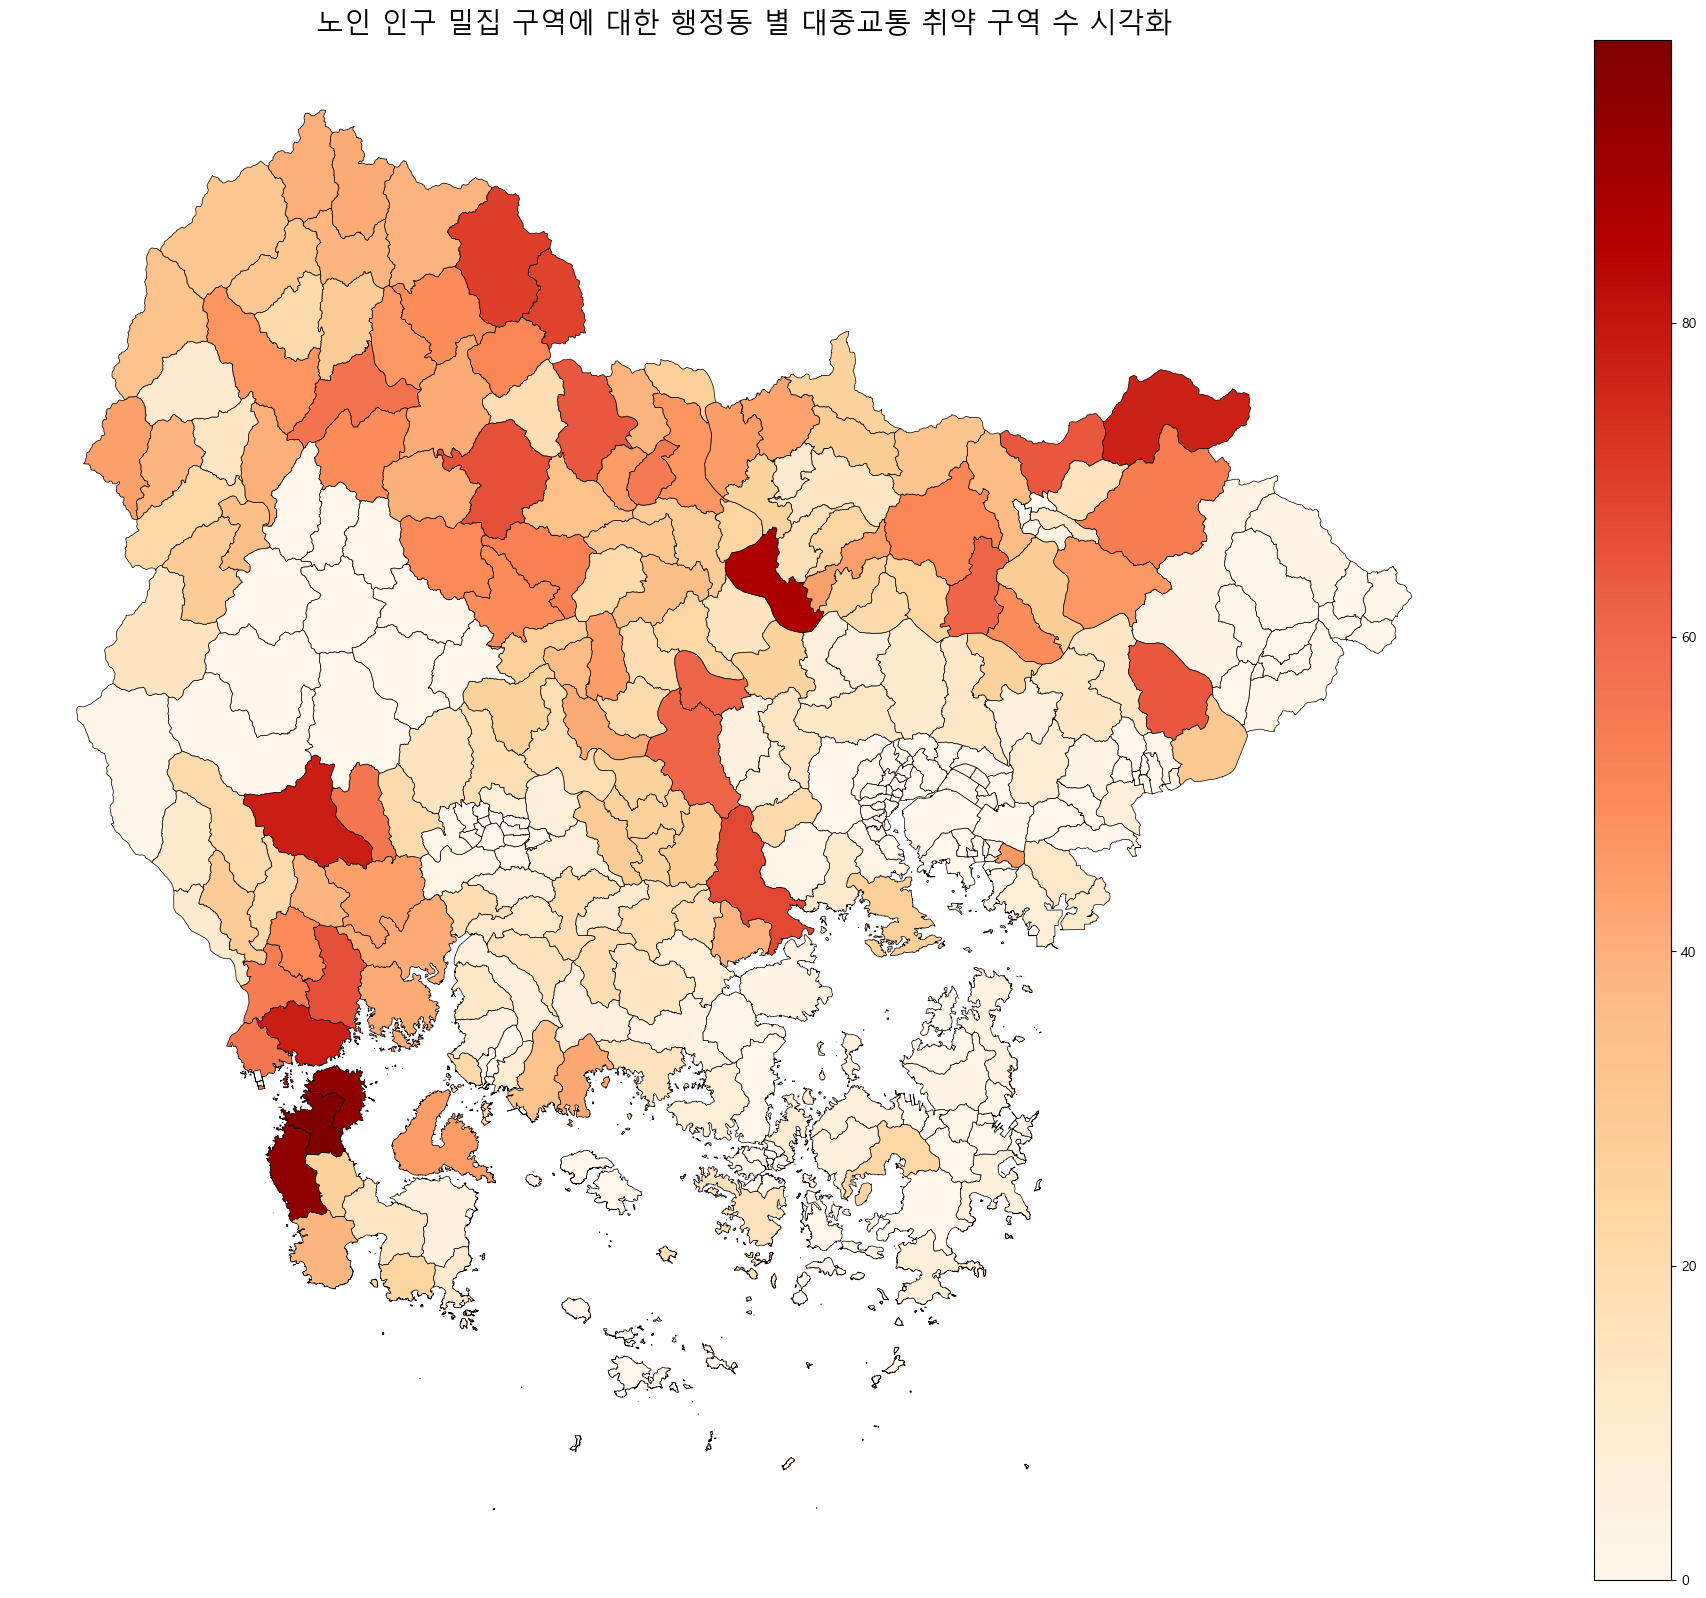

In [30]:
# 시각화
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

# 검은색 배경 설정 (옵션)
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# 읍면동 별 취약 지역 수를 컬러맵으로 시각화
bnd.plot(column='silver_ADM_count', ax=ax, legend=True, cmap='OrRd', edgecolor='black', linewidth=0.5)

plt.title(
    '노인 인구 밀집 구역에 대한 행정동 별 대중교통 취약 구역 수 시각화', 
    color='black', 
    fontsize=20
    )
plt.axis("off")
plt.show()

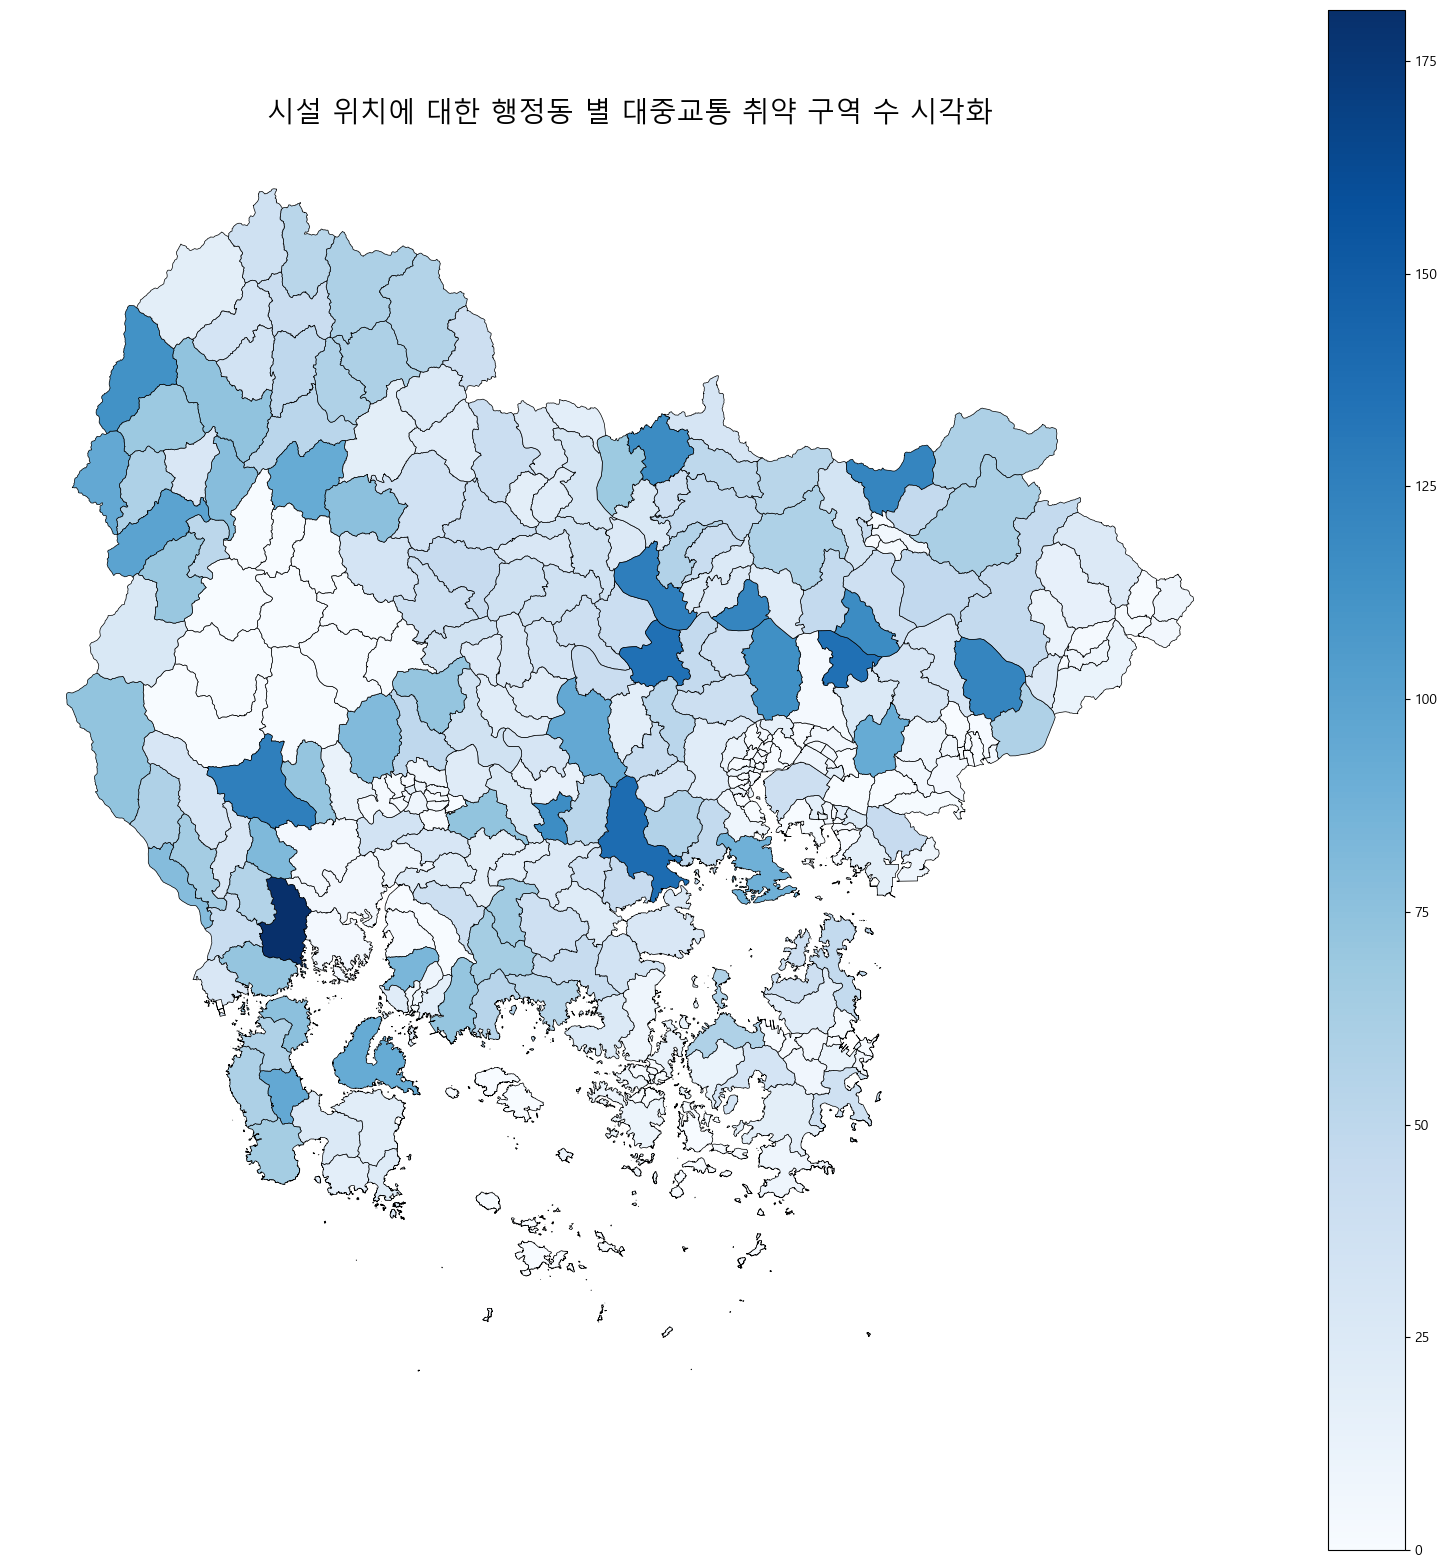

In [32]:
# 시각화
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

# 읍면동 별 취약 지역 수를 컬러맵으로 시각화
bnd.plot(column='facility_ADM_count', ax=ax, legend=True, cmap='Blues', edgecolor='black', linewidth=0.5)

# 검은색 배경 설정 (옵션)
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

plt.title('시설 위치에 대한 행정동 별 대중교통 취약 구역 수 시각화', color='black', fontsize=20)
plt.axis("off")
plt.show()